In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('housing.csv')

In [3]:
data.shape

(20640, 10)

In [4]:
data.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

#### info()
prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### describe()

Generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

For numeric data, the result’s index will include count, mean, std, min, max as well as lower, 50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.

For object data (e.g. strings or timestamps), the result’s index will include count, unique, top, and freq. 

In [6]:
data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

A quantile defines a particular part of a data set, i.e. a quantile determines how many values in a distribution are above or below a certain limit. If we divide a distribution into four equal portions, we will speak of four quartiles (25%. 50%, 75% and 100%).

For example, let's take median_income to illustrate our point. The range of median income is from 0.499(min) to 15.00 (max).
25%( a quarter) of the data values are less than 2.56, 50%(half) of the data values are less than 3.53, 75% are less than 4.74 and 100% data points are below 15.0. 

### Exploratory Analysis Using Pandas Profiling

Pandas profiling is an open source Python module with which we can quickly do an exploratory data analysis with just a few lines of code. In short, what pandas profiling does is save us all the work of visualizing and understanding the distribution of each variable!

You can quickly see which variable are numeric and categorical, the number of missing values in each variable, duplicate values, histograms for continuous variables and bar plots for categorical variables, corrleations among the numeric variables 

In [7]:
from pandas_profiling import ProfileReport

In [8]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Extarcting the numerical variables

Here's how you can extract only the numerical variables from the dataset

In [9]:
numeric_variables = data.select_dtypes(exclude= ['object'])

In [10]:
numeric_variables.head(3)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   

   population  households  median_income  median_house_value  
0       322.0       126.0         8.3252            452600.0  
1      2401.0      1138.0         8.3014            358500.0  
2       496.0       177.0         7.2574            352100.0

### Histograms

The purpose of a histogram  is to graphically summarize the distribution of a univariate data set, be it continuous data or discrete data

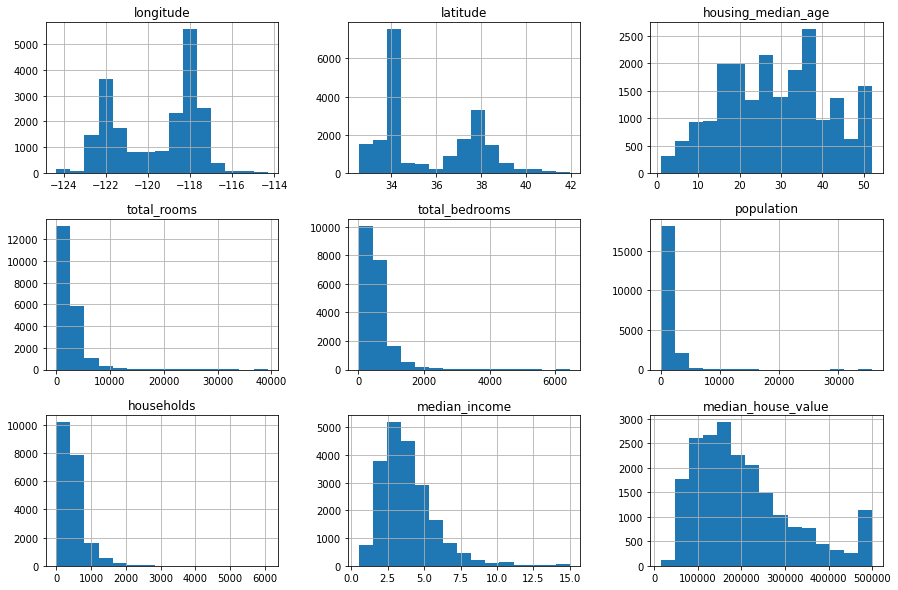

In [11]:
data[numeric_variables.columns.tolist()].hist(bins=15, figsize=(15, 10), layout=(3, 3));

### Extarcting the categorical features

In [12]:
categorical_variables = data.select_dtypes(include= ['object'])

In [13]:
categorical_variables.head(3)

ocean_proximity
0        NEAR BAY
1        NEAR BAY
2        NEAR BAY

C:\Users\ae954301\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


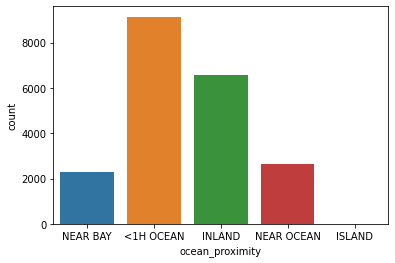

In [14]:
#fig, ax = plt.subplots(1,2, figsize=(20, 10))

for variable in categorical_variables:
    sns.countplot(data[variable])

### Scatterplots to visualize relationship between numerical variables

A scatter plot displays the relationship between 2 numeric variables. A correlation coefficient calculation measure 
the strength of the relationship between the variables.

By looking at the scatterplot, we can quickly see if the two variables have a linear relationship or not and also get an idea of the strength of the relationship.

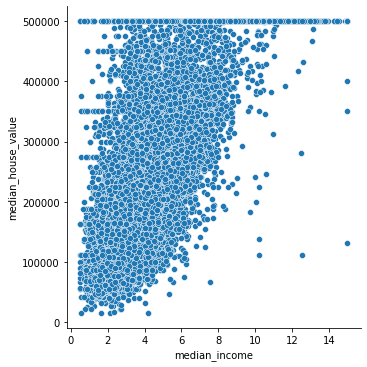

In [15]:
sns.relplot(x="median_income", y="median_house_value", data=data);

While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points 
according to a third variable. In seaborn, this is referred to as using a “hue semantic”, because the color of the point 
gains meaning

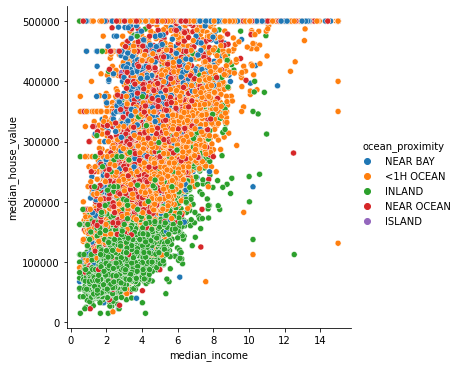

In [16]:
sns.relplot(x="median_income", y="median_house_value", hue="ocean_proximity", data=data);

It’s also possible to represent four variables by changing the hue and style of each point independently. But this should be done carefully, because the eye is much less sensitive to shape than to color

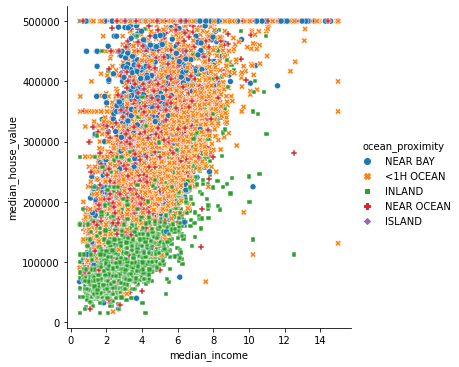

In [17]:
sns.relplot(x="median_income", y="median_house_value", hue="ocean_proximity", style="ocean_proximity", data=data);

### Boxplot to visualize relationship between numerical and categorical variables

The boxplot shows how the data is spread out. Five pieces of information are generally included in the chart:

1. The minimum (the smallest number in the data set)
2. First quartile, Q1
3. The median is shown as a line in the center of the box
4. Third quartile, Q3
5. The maximum (the largest number in the data set), shown at the top of the box.

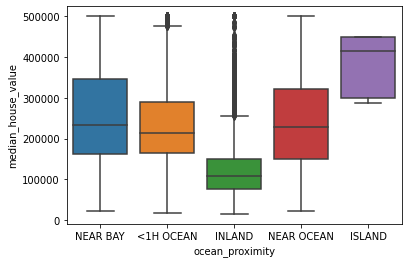

In [18]:
#fig, ax = plt.subplots(1, 1, figsize=(15, 10))
for var in categorical_variables:
    sns.boxplot(x=var, y='median_house_value', data=data)

### Groupby to unearth trends and patterns

Groupby is a powerful and versatile function that allows you to split your data into separate groups to perform computations for better analysis.GroupBy employs the Split-Apply-Combine strategy. Using this strategy, a data analyst can break down a big problem into manageable parts, perform operations on individual parts and combine them back together to answer a specific question

In [19]:
data.groupby("ocean_proximity")['median_house_value'].describe()

count           mean            std       min       25%  \
ocean_proximity                                                             
<1H OCEAN        9136.0  240084.285464  106124.292213   17500.0  164100.0   
INLAND           6551.0  124805.392001   70007.908494   14999.0   77500.0   
ISLAND              5.0  380440.000000   80559.561816  287500.0  300000.0   
NEAR BAY         2290.0  259212.311790  122818.537064   22500.0  162500.0   
NEAR OCEAN       2658.0  249433.977427  122477.145927   22500.0  150000.0   

                      50%       75%       max  
ocean_proximity                                
<1H OCEAN        214850.0  289100.0  500001.0  
INLAND           108500.0  148950.0  500001.0  
ISLAND           414700.0  450000.0  450000.0  
NEAR BAY         233800.0  345700.0  500001.0  
NEAR OCEAN       229450.0  322750.0  500001.0

In [20]:
data.groupby("ocean_proximity")['median_income'].describe()

count      mean       std     min       25%      50%  \
ocean_proximity                                                          
<1H OCEAN        9136.0  4.230682  2.001223  0.4999  2.864900  3.87500   
INLAND           6551.0  3.208996  1.437465  0.4999  2.188950  2.98770   
ISLAND              5.0  2.744420  0.444180  2.1579  2.604200  2.73610   
NEAR BAY         2290.0  4.172885  2.017427  0.4999  2.834750  3.81865   
NEAR OCEAN       2658.0  4.005785  2.010558  0.5360  2.630525  3.64705   

                      75%      max  
ocean_proximity                     
<1H OCEAN        5.180500  15.0001  
INLAND           3.961500  15.0001  
ISLAND           2.833300   3.3906  
NEAR BAY         5.054425  15.0001  
NEAR OCEAN       4.837400  15.0001

### Removing Outliers

### 1.Capping/Flooring Approach 

A value is identified as outlier if it exceeds the value of the 99th percentile of the variable by some factor, or if it is
below the 1st percentile of given values by some factor. 

In [21]:
data['median_house_value'].skew()

#  skewness value explains the extent to which the data is normally distributed. Ideally, the skewness value 
# should be between -1 and +1, and any major deviation from this range indicates the presence of extreme values.

0.9777632739098341

In [22]:
max_threshold = data['median_house_value'].quantile(0.95)
min_threshold = data['median_house_value'].quantile(0.01)

In [23]:
print(max_threshold)
print(min_threshold)

489809.9999999998
50000.0


Here are the outliers according to the capping / flooring method

In [24]:
data[(data['median_house_value']> max_threshold) | (data['median_house_value'] < min_threshold)]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
89       -122.27     37.80                52.0        249.0            78.0   
459      -122.25     37.87                52.0        609.0           236.0   
493      -122.24     37.86                52.0       1668.0           225.0   
494      -122.24     37.85                52.0       3726.0           474.0   
509      -122.23     37.83                52.0       2990.0           379.0   
...          ...       ...                 ...          ...             ...   
20514    -121.52     38.58                24.0        938.0           275.0   
20608    -121.59     39.10                24.0       1107.0           261.0   
20610    -121.56     39.10                28.0       2130.0           484.0   
20611    -121.55     39.10                27.0       1783.0           441.0   
20612    -121.56     39.08                26.0       1377.0           289.0   

       population  households  median_income  median_house_value  \
89          396.0        85.0         1.2434            500001.0   
459        1349.0       250.0         1.1696            500001.0   
493         517.0       214.0         7.8521            500001.0   
494        1366.0       496.0         9.3959            500001.0   
509         947.0       361.0         7.8772            500001.0   
...           ...         ...            ...                 ...   
20514       508.0       253.0         1.6420             32500.0   
20608       768.0       205.0         1.7167             48800.0   
20610      1195.0       439.0         1.3631             45500.0   
20611      1163.0       409.0         1.2857             47000.0   
20612       761.0       267.0         1.4934             48300.0   

      ocean_proximity  
89           NEAR BAY  
459          NEAR BAY  
493          NEAR BAY  
494          NEAR BAY  
509          NEAR BAY  
...               ...  
20514          INLAND  
20608          INLAND  
20610          INLAND  
20611          INLAND  
20612          INLAND  

[1231 rows x 10 columns]

Now we filter the data to remove the outliers

In [25]:
df1= data[(data['median_house_value']< max_threshold) & (data['median_house_value']> min_threshold)]

In [26]:
df1.shape

(19398, 10)

### 2. Standard Deviation Approach

Another technique involves removing data points that are beyond 3 standard deviations from the mean.

In [27]:
upper_limit = data.median_house_value.mean() + 3*data.median_house_value.std()
upper_limit

553042.6645321563

In [28]:
lower_limit = data.median_house_value.mean() - 3*data.median_house_value.std()
lower_limit

-139331.03071432686

Here are the outliers according to the standard deviation method

In [29]:
data[(data['median_house_value']> upper_limit) | (data['median_house_value']< lower_limit)]

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []

Hence, we see that there exist no outliers in our data according to this approach. This shows us removing outliers is not
a simple and straightforward method. It requires domain knowledge about the business use case to label a data point as an outlier or not.

In [30]:
df2= data[(data['median_house_value']< upper_limit) & (data['median_house_value']> lower_limit)]

In [31]:
df2.shape

(20640, 10)

### 3. Identifying Outliers with Interquartile Range (IQR)

The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1. 

The rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed

In [32]:
Q1 = data.median_house_value.quantile(0.25)
Q3 = data.median_house_value.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

145125.0


In [34]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-98087.5, 482412.5)

In [38]:
data[(data['median_house_value'] > lower_limit) & (data['median_house_value'] < upper_limit)]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[19569 rows x 10 columns]